# The Engaged Election  : An analysis of Disinformation that Revolutionized the Philippine Election.

## TABLE OF CONTENTS


1. <a href="#context">Context</a>
2. <a href="#dataset">Dataset</a>
3. <a href="#methodology">Methodology</a> <br/>
    3.1 <a href="#data_preprocess">Data Preprocessing</a> <br/>
    3.2 <a href="#understand_data">Understanding the election data set</a> <br/>
    3.3 <a href="#demographic">Demographic Study</a> <br/>
    3.4 <a href="#web_scrape">Web Scraping Fake news articles</a> <br/>
    3.5 <a href="#word_cloud">Word Cloud</a>
4. <a href="#sentiment_analysis">Sentiment Analysis</a>
5. <a href="#tech_used">Techniques Used</a>
6. <a href="#add_dataset_used">Additional Dataset Used</a>
7. <a href="#findings">Findings</a>
8. <a href="#limitation">Limitations of the EDA</a>


## CONTEXT
<a id="context"></a>


According to a widely circulated story on Philippine social media, Ferdinand Marcos Sr, the late dictator who imposed a brutal martial law regime on the country between 1972 and 1986, owed his vast wealth to the Maharlika Kingdom's Tallano royal family, who paid him 192,000 tons of gold for his legal services.

This is one of the stories that made a huge campaign of disinformation aimed at whitewashing the Marcos regime. And, on May 9, 2022, the Philippines' national and local elections were the first to be held under a global pandemic, and the outcome is likely to be shaped by social media.

Using the dataset given, we will use data analysis techniques and tools to pin point and uncover insights regarding the Philippine election. The exploratory data analysis of the team seeks to examine the extent to which disinformation propaganda makes use of social media to further political agenda and how it revolutionized the 2022 Philippine election.

The exploration of the answers to the following formulated questions is the key contribution of this work:

- Q1: What is the relationship between disinformation and election results?
- Q2: What are the mediums of deceptive content?
- Q3: How does the social engagment affects the Philippine Election?
- Q4: How does the polarity of each fake news article affects the Philippine Election?


Note: The formulated questions is expected to yield different insights but not all insights will be part of the presentation.


## Dataset
<a id="dataset"></a>

<h4> Election Dataset </h4>

pres_precinct_data_2022.csv : Contains the election results of the 2022 Philippine presidential elections at a per-precinct level.

2022NLEPOP.xslx : Contains precinct descriptions and polling centers centers for the 2022 Philippine presidential elections.

vp_precinct_data_2016.csv : Contains the election results of the 2016 Philippine vice-presidential elections at a per-precinct level.

## Methodology
<a id="methodology"></a>

The team utilize Python, Excel, and Tableau as its main data analysis tools.

In [ ]:
# Python Libraries used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup
import lxml
from wordcloud import WordCloud 
import re
import string
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing
<a id="data_preprocess"></a>

The team investigated the data set using python and excel to get a comprehensive view of the data. and to our pleasant surprise, we found that we had clean data. As a result, all that we needed to do was eliminate the columns that we believed to be unnecessary to our needs.

In [ ]:
pres_precint_data = pd.read_csv("dataset/pres_precinct_data_2022.csv")
vp_precint_data = pd.read_csv("dataset/vp_precinct_data_2016.csv")
pres_data_2022 = pres_precint_data.copy()
vp_data_2016 = vp_precint_data.copy()

In [ ]:
pres_data_2022.rename(columns = {
    'ABELLA, ERNIE (IND)': 'Ernie Abella', 
    'DE GUZMAN, LEODY (PLM)' : 'Leody De Guzman',
    'DOMAGOSO, ISKO MORENO (AKSYON)' : 'Isko Domagoso',
    'GONZALES, NORBERTO (PDSP)' : 'Norberto Gonzales',
    'LACSON, PING (PDR)' : 'Ping Lacson',
    'MANGONDATO, FAISAL (KTPNAN)' : 'Faisal Mangondato',
    'MARCOS, BONGBONG (PFP)' : 'Bongbong Marcos',
    'MONTEMAYOR, JOSE JR. (DPP)' : 'Jose Montemayor',
    'PACQUIAO, MANNY PACMAN(PROMDI)' : 'Manny Pacquiao',
    'ROBREDO, LENI (IND)' : 'Leni Robredo'

    }, inplace = True)

pres_data_2022 = pres_data_2022[[
    'Precinct ID',
    'Region',
    'Bongbong Marcos',
    'Leni Robredo',
    'Ernie Abella',
    'Leody De Guzman',
    'Isko Domagoso',
    'Norberto Gonzales',
    'Ping Lacson',
    'Faisal Mangondato',
    'Jose Montemayor',
    'Manny Pacquiao'
]]

In [ ]:
region_dict = {"Region":
            {"REGION I": "REGION 1",
            "REGION II": "REGION 2",
            "REGION III": "REGION 3",
            "REGION IV-A": "REGION 4-A",
            "REGION IV-B": "REGION 4-B",
            "REGION V": "REGION 5",
            "REGION VI": "REGION 6",
            "REGION VII": "REGION 7",
            "REGION VIII": "REGION 8",
            "REGION IX": "REGION 9",
            "REGION X": "REGION 10",
            "REGION XI": "REGION 11",
            "REGION XII": "REGION 12",
            "REGION XIII": "REGION 13"
            }
        }
pres_data_2022.replace(region_dict, inplace=True)

In [ ]:
region_dict2 = {"region":
            {"REGION I": "REGION 1",
            "REGION II": "REGION 2",
            "REGION III": "REGION 3",
            "REGION IV-A": "REGION 4-A",
            "REGION IV-B": "REGION 4-B",
            "REGION V": "REGION 5",
            "REGION VI": "REGION 6",
            "REGION VII": "REGION 7",
            "REGION VIII": "REGION 8",
            "REGION IX": "REGION 9",
            "REGION X": "REGION 10",
            "REGION XI": "REGION 11",
            "REGION XII": "REGION 12",
            "REGION XIII": "REGION 13"
            }
        }

vp_data_2016.replace(region_dict2, inplace=True)

In [ ]:
pres_data_2022

,Precinct ID,Region,Bongbong Marcos,Leni Robredo,Ernie Abella,Leody De Guzman,Isko Domagoso,Norberto Gonzales,Ping Lacson,Faisal Mangondato,Jose Montemayor,Manny Pacquiao
0,13010009,REGION 10,224,29,2,1,4,0,0,1,0,115
1,13010010,REGION 10,310,47,3,5,7,5,0,2,1,188
2,13010011,REGION 10,288,44,4,3,9,4,3,0,4,152
3,13010012,REGION 10,190,51,2,2,16,2,3,0,3,160
4,13010013,REGION 10,272,46,0,1,16,4,6,0,2,125
...,...,...,...,...,...,...,...,...,...,...,...,...
105661,8120018,REGION 3,347,124,3,0,38,0,7,0,1,12
105662,8120049,REGION 3,243,197,2,0,58,2,5,1,0,7
105663,8120050,REGION 3,233,236,0,0,37,1,10,0,1,5
105664,8120003,REGION 3,194,127,3,1,20,2,11,0,0,9


In [ ]:
pres_data_2022.describe()

,Precinct ID,Bongbong Marcos,Leni Robredo,Ernie Abella,Leody De Guzman,Isko Domagoso,Norberto Gonzales,Ping Lacson,Faisal Mangondato,Jose Montemayor,Manny Pacquiao
count,1.056660e+05,105666.000000,105666.000000,105666.000000,105666.000000,105666.000000,105666.000000,105666.000000,105666.000000,105666.000000,105666.000000
mean,4.165413e+07,293.584029,139.925615,1.069568,0.869703,17.842684,0.840848,8.332737,2.409034,0.566171,34.310384
std,2.277584e+07,138.875855,110.376406,1.452748,1.204041,24.396067,1.349180,8.616097,17.309210,1.013811,51.216117
min,1.010001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.217075e+07,191.000000,52.000000,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000,0.000000,6.000000
50%,3.914147e+07,304.000000,121.000000,1.000000,1.000000,12.000000,1.000000,6.000000,0.000000,0.000000,14.000000
75%,5.813008e+07,392.000000,195.000000,2.000000,1.000000,23.000000,1.000000,12.000000,1.000000,1.000000,41.000000
max,9.315002e+07,1105.000000,790.000000,33.000000,66.000000,351.000000,197.000000,225.000000,573.000000,37.000000,615.000000


In [ ]:
vp_data_2016 = vp_data_2016[[
'region',
'marcos',
'robredo',
'cayetano',
'escudero',
'honasan',
'trillanes',
'province',
'municipality',
'barangay',
'clustered_precinct',
'registered_voters',
'ballots_cast',
'precincts',
'polling_center',
'timestamp',
]]

In [ ]:
vp_data_2016.columns = map(str.capitalize, vp_data_2016.columns)
vp_data_2016.rename(columns = {
    'Cayetano': 'Alan Cayetano', 
    'Escudero' : 'Francis Escudero',
    'Honasan' : 'Gregorio Honasan',
    'Marcos' : 'Bongbong Marcos',
    'Robredo' : 'Leni Robredo',
    'Trillanes' : 'Antonio Trillanes',
    }, inplace = True)

In [ ]:
vp_data_2016

,Region,Bongbong Marcos,Leni Robredo,Alan Cayetano,Francis Escudero,Gregorio Honasan,Antonio Trillanes,Province,Municipality,Barangay,Clustered_precinct,Registered_voters,Ballots_cast,Precincts,Polling_center,Timestamp
0,REGION 1,230,138,25,47,8,8,PANGASINAN,CALASIAO,BUENLAG,55170026,592,503,"0060A, 0060B, 0061A, 0062A",BUENLAG ELEMENTARY SCHOOL,05/09/2016 19:11:37
1,REGION 1,191,137,28,52,3,7,PANGASINAN,CALASIAO,BUENLAG,55170027,526,458,"0062B, 0063A, 0063B, 0064A",BUENLAG ELEMENTARY SCHOOL,05/09/2016 18:39:48
2,REGION 1,295,156,32,75,5,12,PANGASINAN,CALASIAO,BUENLAG,55170023,723,649,"0051C, 0052A, 0052B, 0053A, 0053B",BUENLAG ELEMENTARY SCHOOL,05/09/2016 18:36:49
3,REGION 1,291,172,50,91,5,14,PANGASINAN,CALASIAO,BUENLAG,55170022,768,650,"0049A, 0050A, 0050B, 0051A, 0051B",BUENLAG ELEMENTARY SCHOOL,05/09/2016 17:12:03
4,REGION 1,303,162,58,96,3,14,PANGASINAN,CALASIAO,BUENLAG,55170025,787,662,"0056C, 0057A, 0057B, 0058A, 0058B, 0059A, 0059B",BUENLAG ELEMENTARY SCHOOL,05/09/2016 18:34:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90637,REGION 9,14,122,59,26,2,4,ZAMBOANGA DEL NORTE,MUTIA,DILAND,72080005,327,284,"0012A, 0013A",DILAND ELEMENTARY SCHOOL,05/09/2016 23:42:49
90638,REGION 9,12,106,41,10,3,0,ZAMBOANGA DEL NORTE,MUTIA,HEAD TIPAN,72080007,252,235,"0015A, 0016A",HEAD TIPAN ELEMENTARY SCHOOL,05/09/2016 21:59:44
90639,REGION 9,82,214,100,51,7,1,ZAMBOANGA DEL NORTE,MUTIA,SANTO TOMAS,72080018,628,529,"0035A, 0035B, 0036A, 0036B",MUTIA NATIONAL HIGH SCHOOL,05/09/2016 22:31:13
90640,REGION 9,59,163,101,36,2,7,ZAMBOANGA DEL NORTE,MUTIA,SANTO TOMAS,72080017,532,474,"0032A, 0033A, 0034A",MUTIA NATIONAL HIGH SCHOOL,05/10/2016 23:11:07


In [ ]:
vp_data_2016.describe()

,Bongbong Marcos,Leni Robredo,Alan Cayetano,Francis Escudero,Gregorio Honasan,Antonio Trillanes,Clustered_precinct,Registered_voters,Ballots_cast
count,90642.000000,90642.000000,90642.000000,90642.000000,90642.000000,90642.000000,9.064200e+04,90642.000000,90642.000000
mean,152.301163,154.712385,62.647459,53.091768,8.389510,9.313828,4.141759e+07,591.695031,482.313530
std,112.812729,95.995303,72.248531,42.249895,12.549946,9.416565,2.264942e+07,160.024114,132.618751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010001e+06,1.000000,0.000000
25%,60.000000,87.000000,18.000000,25.000000,3.000000,4.000000,2.217055e+07,494.000000,403.000000
50%,129.000000,144.000000,40.000000,44.000000,6.000000,7.000000,3.910120e+07,619.000000,501.000000
75%,225.000000,204.000000,72.000000,72.000000,10.000000,12.000000,5.808018e+07,722.000000,583.000000
max,756.000000,754.000000,612.000000,692.000000,734.000000,344.000000,9.315006e+07,1000.000000,1000.000000


## Understanding the Election Data Set
<a id="understand_data"></a>

To aid in the comprehension of the phenomena being examined. The first approach is to have a thorough grasp of the election results. The team demonstrated that separating the analysis into regions would offer them with a more succinct issue to investigate by restricting the scope of the research.

In [ ]:
print("\n2022 President Results")
print(pres_data_2022[pres_data_2022.columns[2:12]].sum().sort_values(ascending=False))

print("\n2016 VP Results")
print(vp_data_2016[vp_data_2016.columns[1:7]].sum().sort_values(ascending=False))



2022 President Results
Bongbong Marcos      31021850
Leni Robredo         14785380
Manny Pacquiao        3625441
Isko Domagoso         1885365
Ping Lacson            880487
Faisal Mangondato      254553
Ernie Abella           113017
Leody De Guzman         91898
Norberto Gonzales       88849
Jose Montemayor         59825
dtype: int64

2016 VP Results
Leni Robredo         14023440
Bongbong Marcos      13804882
Alan Cayetano         5678491
Francis Escudero      4812344
Antonio Trillanes      844224
Gregorio Honasan       760442
dtype: int64


In [ ]:
# Total votes Vice-President (2016) VS Region

vp_agg_function = {'Bongbong Marcos': 'sum', 'Leni Robredo': 'sum', 'Alan Cayetano': 'sum', 'Francis Escudero': 'sum', 'Gregorio Honasan': 'sum', 'Antonio Trillanes': 'sum'}
vp_data_2016_new = vp_data_2016.groupby(vp_data_2016['Region']).aggregate(vp_agg_function)
vp_data_2016_new

,Bongbong Marcos,Leni Robredo,Alan Cayetano,Francis Escudero,Gregorio Honasan,Antonio Trillanes
Region,,,,,,
ARMM,283884,464605,153957,90523,46093,28239
CAR,446960,116213,26057,58718,12328,17313
NCR,2179053,1361617,611338,503414,70298,52423
NIR,225922,969381,199504,205296,27851,79692
OAV,75140,31117,53403,6025,1049,1167
REGION 1,1764750,297974,63844,169957,22140,36489
REGION 10,436300,694737,435125,163663,46364,33490
REGION 11,467186,233920,1074658,93451,20220,13663
REGION 12,512497,422817,366487,102855,35606,43648


Text(0, 0.5, 'Votes per Million')

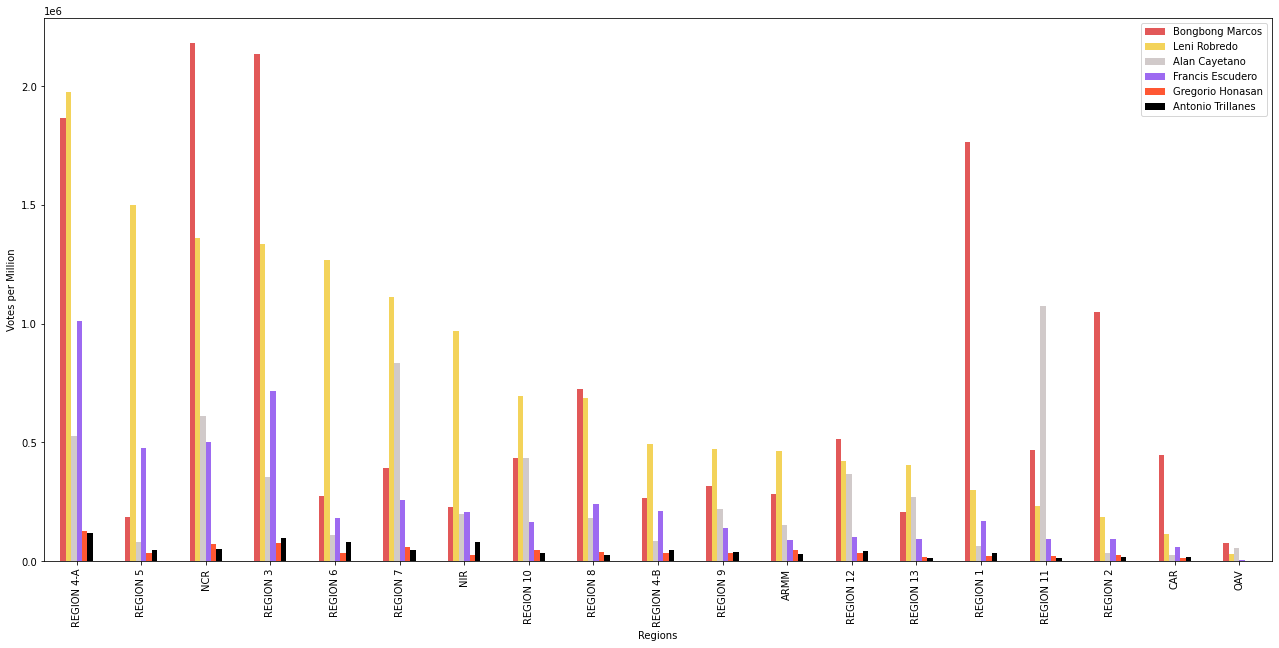

In [ ]:
# Vertical Barchart of all candidates per region (VP 2016)

vp_agg_function = {'Bongbong Marcos': 'sum', 'Leni Robredo': 'sum', 'Alan Cayetano': 'sum', 'Francis Escudero': 'sum', 'Gregorio Honasan': 'sum', 'Antonio Trillanes': 'sum'}
vp_data_2016_new = vp_data_2016.groupby(vp_data_2016['Region']).aggregate(vp_agg_function)

vp_col_colors = ['#E25858', '#F3D35A', '#D1CACA', '#9D6AF1', '#FF5733', '000000']
df_sorted_vp_2022 = vp_data_2016_new.sort_values('Leni Robredo', ascending=False)
vp_barchart = df_sorted_vp_2022.plot(kind="bar", color=vp_col_colors)

vp_figure = vp_barchart.get_figure()
vp_figure.set_size_inches(22, 10)
vp_barchart.set_xlabel("Regions")
vp_barchart.set_ylabel("Votes per Million")


The result in 2016 gave a close tie with Marcos vs Robredo. Here on the graph, we can see 10 out of 19 region, Leni Robredo was the leading candidate.

In [ ]:
# Total votes President (2022) VS Region
region_sort = ['BARMM', 'CORDILLERA ADMINISTRATIVE REGION', 'NATIONAL CAPITAL REGION', 'OAV', 'REGION 1', 'REGION 2', 'REGION 3', 'REGION 4-A', 'REGION 4-B', 'REGION 5', 'REGION 6', 'REGION 7', 'REGION 8', 'REGION 9', 'REGION 10', 'REGION 11', 'REGION 12', 'REGION 13']
p_agg_function = {'Bongbong Marcos': 'sum', 'Leni Robredo': 'sum', 'Ernie Abella': 'sum', 'Leody De Guzman': 'sum', 'Isko Domagoso': 'sum', 'Norberto Gonzales': 'sum', 'Ping Lacson': 'sum', 'Faisal Mangondato': 'sum', 'Jose Montemayor': 'sum', 'Manny Pacquiao': 'sum'}
pres_data_2022_new = pres_data_2022.groupby(pres_data_2022['Region']).aggregate(p_agg_function)
#pres_data_2022_new.index = pd.CategoricalIndex(pres_data_2022_new['Bongbong Marcos'], categories=region_sort, ordered=True)
#pres_data_2022_new = pres_data_2022_new.sort_index()

pres_data_2022_new

,Bongbong Marcos,Leni Robredo,Ernie Abella,Leody De Guzman,Isko Domagoso,Norberto Gonzales,Ping Lacson,Faisal Mangondato,Jose Montemayor,Manny Pacquiao
Region,,,,,,,,,,
BARMM,997046,425074,3267,1367,52766,2824,5338,154323,1050,36198
CORDILLERA ADMINISTRATIVE REGION,746084,88439,1136,1059,13331,860,21265,1156,1318,20125
NATIONAL CAPITAL REGION,3247385,1795041,4004,8950,511349,5057,136420,9010,4390,91702
OAV,308853,82779,233,219,16210,308,5085,677,152,3745
REGION 1,2547508,329361,4659,4124,48018,3531,30984,2468,2409,34444
REGION 10,1718055,274346,6712,5098,50543,5061,20810,25894,3690,328761
REGION 11,2059124,134337,6544,4282,24438,5080,23450,6723,3220,202204
REGION 12,1265044,257547,4851,3532,41094,3856,21635,12702,2928,397673
REGION 13,948257,287936,4899,3064,22235,3713,10699,1823,2191,166208


Text(0, 0.5, 'Votes per Million')

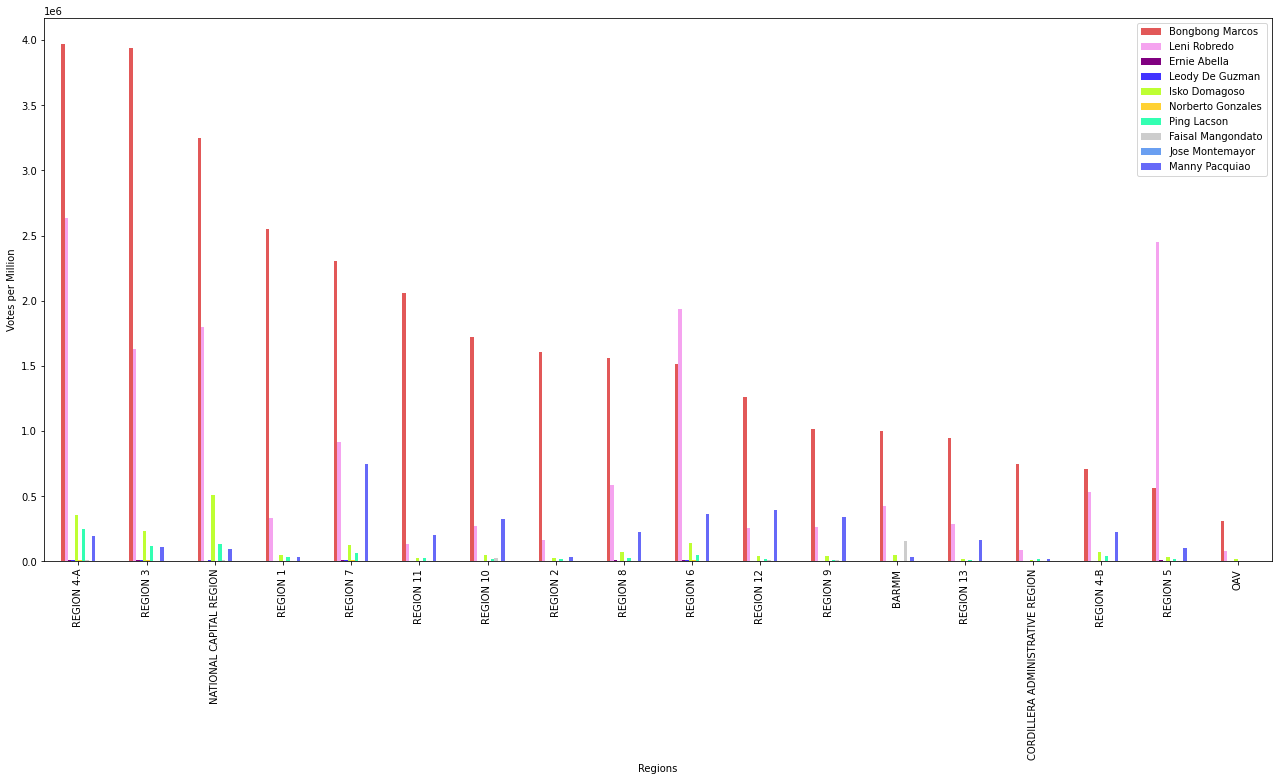

In [ ]:
# Vertical Barchart of all candidates per region (President 2022)
p_agg_function = {'Bongbong Marcos': 'sum', 'Leni Robredo': 'sum', 'Ernie Abella': 'sum', 'Leody De Guzman': 'sum', 'Isko Domagoso': 'sum', 'Norberto Gonzales': 'sum', 'Ping Lacson': 'sum', 'Faisal Mangondato': 'sum', 'Jose Montemayor': 'sum', 'Manny Pacquiao': 'sum'}
pres_data_2022_new = pres_data_2022.groupby(pres_data_2022['Region']).aggregate(p_agg_function)

pres_col_colors = ['#E25858', '#F5A3EF', '#800080', '#4233FF', '#BEFF33', '#FFD133', '#33FFB2', '#CDCDCD', '#6A9FF1', '#6669F8']

df_sorted_pres_2022 = pres_data_2022_new.sort_values('Bongbong Marcos', ascending=False)
pres_2022_barchart = df_sorted_pres_2022.plot(kind="bar", color=pres_col_colors)

pres_figure = pres_2022_barchart.get_figure()

pres_figure.set_size_inches(22,10)
pres_2022_barchart.set_xlabel("Regions")
pres_2022_barchart.set_ylabel("Votes per Million")

## Demographic Study (Filipino Facebook user & Voter's Profile)
<a id="demographic"></a>

In [ ]:
# FB user demographics data
# Voters profile Dataset
#

fb_user_data2022 = pd.read_csv("dataset/fb_user_2022.csv")
voters_profile2022 = pd.read_csv("dataset/voters_profile_2022.csv")
voters_profile2016 = pd.read_csv("dataset/voters_profile_2016.csv")

# DF
fb_demographic2022 = fb_user_data2022.copy()
voters_demographic2022 = voters_profile2022.copy()
voters_demographic2016 = voters_profile2016.copy()

In [ ]:
fb_age_data_2022_male = fb_demographic2022.loc[(fb_demographic2022["Gender"] == "M") & (fb_demographic2022["Year"] == 2022)];

fb_demographic2022_total = fb_demographic2022.loc[(fb_demographic2022["Year"] == 2022) & (fb_demographic2022["Month"] == "April")].sum()
fb_demographic2022_total[3:].sum()

94200000

In [ ]:
# Male FB users total by age group in 2022

fb_age_data_2022_male = fb_demographic2022.loc[(fb_demographic2022["Gender"] == "M") & (fb_demographic2022["Year"] == 2022) & (fb_demographic2022["Month"] == "April")];
fb_age_data_2022_male

,Year,Month,Gender,13-17,18-24,25-34,35-44,45-54,55-64,65+
1,2022,April,M,4400000,13100000,13100000,7000000,3500000,1700000,1300000


In [ ]:
# Female FB users total by age group in 2022

fb_age_data_2022_female = fb_demographic2022.loc[(fb_demographic2022["Gender"] == "F") & (fb_demographic2022["Year"] == 2022) & (fb_demographic2022["Month"] == "April")];
fb_age_data_2022_female

,Year,Month,Gender,13-17,18-24,25-34,35-44,45-54,55-64,65+
0,2022,April,F,5300000,15400000,13300000,7500000,4200000,2500000,1900000


In [ ]:
fb_age_data_2022 = fb_demographic2022.loc[(fb_demographic2022["Year"] == 2022) & (fb_demographic2022["Month"] == "April")];
fb_age_data_2022.drop(["Month","13-17"], axis=1, inplace=True);
fb_age_data_2022

,Year,Gender,18-24,25-34,35-44,45-54,55-64,65+
0,2022,F,15400000,13300000,7500000,4200000,2500000,1900000
1,2022,M,13100000,13100000,7000000,3500000,1700000,1300000


In [ ]:
fb_age_data_2022.T

,0,1
Year,2022,2022
Gender,F,M
18-24,15400000,13100000
25-34,13300000,13100000
35-44,7500000,7000000
45-54,4200000,3500000
55-64,2500000,1700000
65+,1900000,1300000


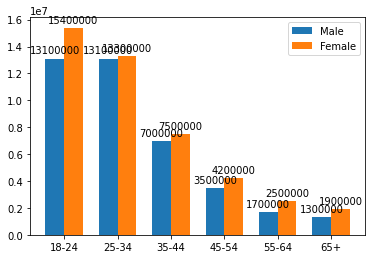

In [ ]:
age_group_dup = list(fb_age_data_2022.columns[2:])
fb_age_group_2022_dup = fb_age_data_2022.groupby('Gender')[age_group_dup].mean()


indx = np.arange(len(age_group_dup))

male_means = list(fb_age_group_2022_dup.T['M'])
female_means = list(fb_age_group_2022_dup.T['F'])

bar_width = 0.35

fig, ax = plt.subplots()
barMale = ax.bar(indx - bar_width/2, male_means, bar_width, label='Male')
barFemale = ax.bar(indx + bar_width/2, female_means, bar_width, label='Female')

# inserting x axis label
ax.set_xticks(indx)
ax.set_xticklabels(age_group_dup)

# inserting y axis label
#ax.set_yticks(score_label)
#ax.set_yticklabels(score_label)

# inserting legend
ax.legend()

def insert_data_labels(bars):
	for bar in bars:
		bar_height = bar.get_height()
		ax.annotate('{0:.0f}'.format(bar.get_height()),
			xy=(bar.get_x() + bar.get_width() / 2, bar_height),
			xytext=(0, 3),
			textcoords='offset points',
			ha='center',
			va='bottom'
		)

insert_data_labels(barMale)
insert_data_labels(barFemale)

plt.show()

Majority of legal age group that can vote are the 18-24 years old. Second to the graph is the age group 25-44.

In [ ]:
# Age group of each region 2016 VP Elections
# 18-24	25-34	35-44	45-54	55-65	65+
age2016_agg = {'18-24' : 'sum', '25-34' : 'sum', '35-44' : 'sum', '45-54' : 'sum', '55-65' : 'sum', '65+' : 'sum'}
age_group_2016 = voters_demographic2016.groupby(voters_demographic2016['REGION']).aggregate(age2016_agg)
age_group_2016

,18-24,25-34,35-44,45-54,55-65,65+
REGION,,,,,,
BARMM,545659,417389,315394,218398,119046,75364
CORDILLERA ADMINISTRATIVE REGION,172050,243091,172248,142779,101267,74727
NATIONAL CAPITAL REGION,1197022,1573513,1318182,1040565,713070,410897
REGION 1,539667,729733,577328,477027,345973,281047
REGION 10,473568,659906,503790,412872,289733,201462
REGION 11,616946,696044,527617,405218,269060,144819
REGION 12,367618,575047,445055,345511,216571,136310
REGION 13,312733,396106,292059,244840,170700,130655
REGION 2,434302,462447,374941,310428,213291,125543


In [ ]:
age_group_2016.describe()

,18-24,25-34,35-44,45-54,55-65,65+
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,17.000000
mean,6.465896e+05,8.032764e+05,6.370838e+05,5.105636e+05,349790.176471,240453.117647
std,3.648314e+05,4.833220e+05,4.043477e+05,3.162739e+05,216456.681266,138371.499925
min,1.720500e+05,2.430910e+05,1.722480e+05,1.427790e+05,101267.000000,74727.000000
25%,3.762810e+05,4.624470e+05,3.749410e+05,3.104280e+05,211852.000000,130655.000000
50%,5.456590e+05,6.599060e+05,5.037900e+05,4.128720e+05,289733.000000,201462.000000
75%,8.278400e+05,9.484140e+05,7.802210e+05,6.683900e+05,470673.000000,335097.000000
max,1.526691e+06,1.973357e+06,1.605695e+06,1.216452e+06,812860.000000,484217.000000


In [ ]:
# Age group of each region 2022 Presidentail Elections
# 18-24	25-34	35-44	45-54	55-59	60+
age2022_agg = {'18-24' : 'sum', '25-34' : 'sum', '35-44' : 'sum', '45-54' : 'sum', '55-59' : 'sum', '60+' : 'sum'}
age_group_2022 = voters_demographic2022.groupby(voters_demographic2022['REGION']).aggregate(age2022_agg)
age_group_2022

,18-24,25-34,35-44,45-54,55-59,60+
REGION,,,,,,
BARMM,507343,802985,490106,371553,125937,290269
CORDILLERA ADMINISTRATIVE REGION,183469,274382,212641,162462,71374,173572
NATIONAL CAPITAL REGION,1043603,1798356,1517900,1243080,511773,1207649
REGION 1,635157,841862,682870,549327,235208,602340
REGION 10,562723,782561,586714,471908,197336,459243
REGION 11,514584,839998,666435,525014,210309,479911
REGION 12,382405,588754,463461,367983,143239,314889
REGION 13,364531,474078,346275,279371,119375,285168
REGION 2,374626,535882,422686,353587,153978,364768


Text(0, 0.5, 'Number of Individuals per Million')

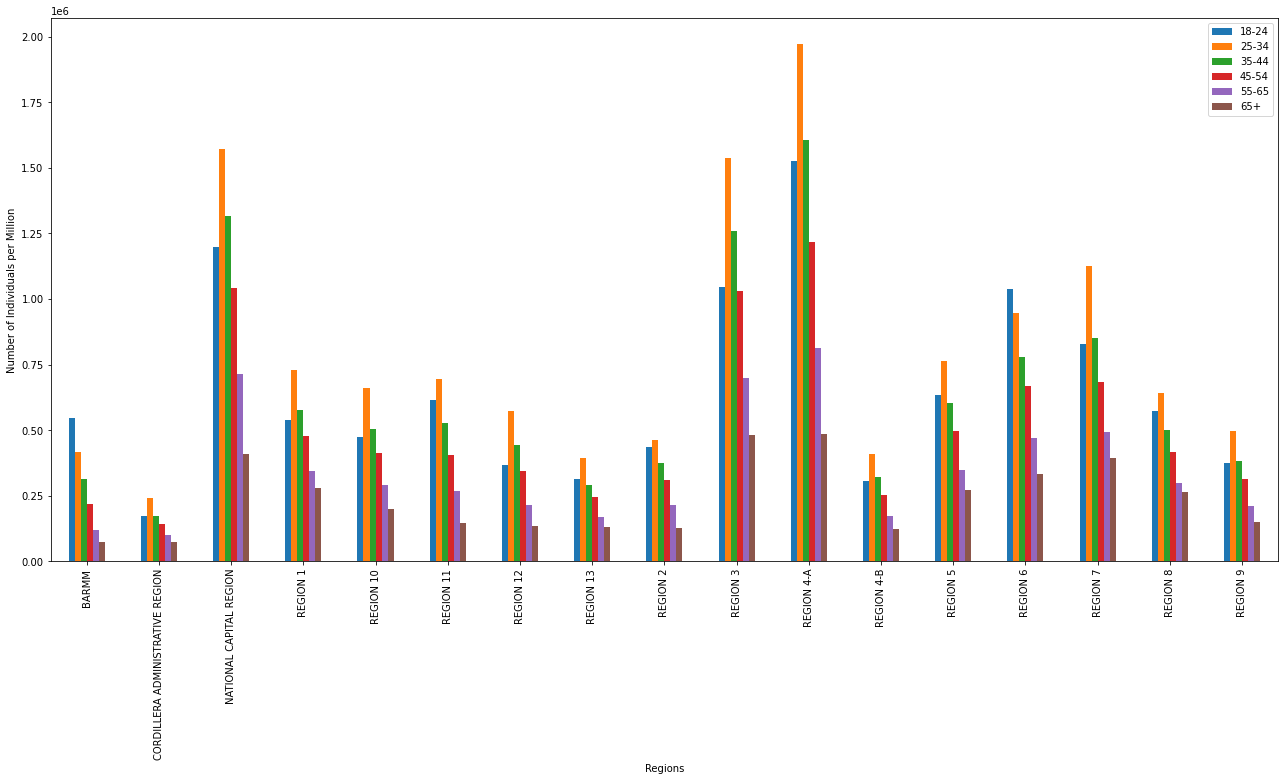

In [ ]:
# Vertical Barchart of all age groups per region 2016
age2016_agg = {'18-24' : 'sum', '25-34' : 'sum', '35-44' : 'sum', '45-54' : 'sum', '55-65' : 'sum', '65+' : 'sum'}
age_group_2016 = voters_demographic2016.groupby(voters_demographic2016['REGION']).aggregate(age2016_agg)

age_group2016_chart = age_group_2016.plot(kind="bar")

age_group2016_figure = age_group2016_chart.get_figure()
age_group2016_figure.set_size_inches(22,10)
age_group2016_chart.set_xlabel("Regions")
age_group2016_chart.set_ylabel("Number of Individuals per Million")


Excluding the Bangsamoro Autonomous Region in Muslim Mindanao and region 6, ages from 25-34 are the most abundant registered voters from each region based on the 2016 voters' profile data set.


Text(0, 0.5, 'Number of Individuals per Million')

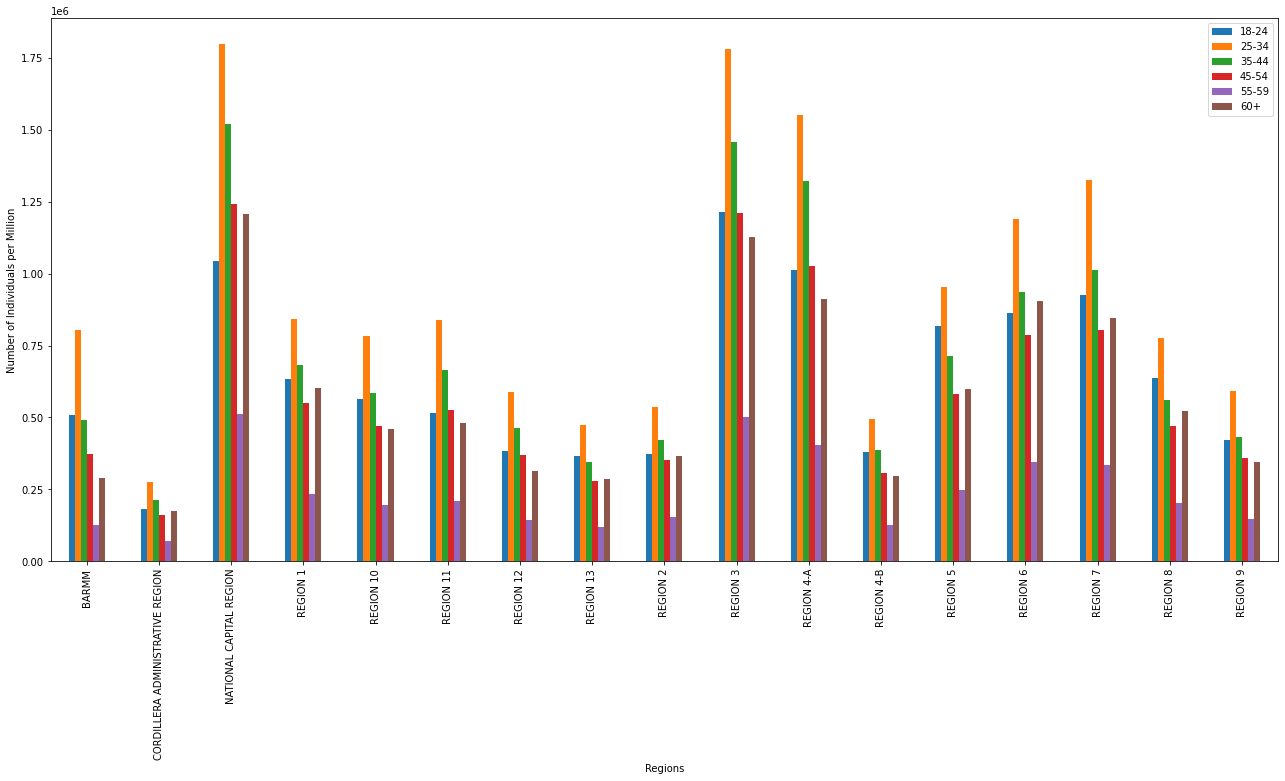

In [ ]:
# Vertical Barchart of all age groups per region 2022 
age2022_agg = {'18-24' : 'sum', '25-34' : 'sum', '35-44' : 'sum', '45-54' : 'sum', '55-59' : 'sum', '60+' : 'sum'}
age_group_2022 = voters_demographic2022.groupby(voters_demographic2022['REGION']).aggregate(age2022_agg)

age_group2022_chart = age_group_2022.plot(kind="bar")

age_group2022_figure = age_group2022_chart.get_figure()
age_group2022_figure.set_size_inches(22,10)
age_group2022_chart.set_xlabel("Regions")
age_group2022_chart.set_ylabel("Number of Individuals per Million")

Vertical bar chart of all age groups from each region based on the 2022 voters' profile. It is evident within the registered voters where ages 25-34 are the most abundant across each region in the Philippines.

Reliance on social media in the campaign strategy of candidates is expected to rise given the increased usage by Filipinos of this technology, and the physical restrictions imposed by the Covid-19 pandemic. While it remains doubtful that a candidate can win the presidency through a successful social media strategy alone, there is a realization that this type of technology is becoming an indispensable part of the contemporary electoral “political machine”.

Text(0, 0.5, 'Votes per Million')

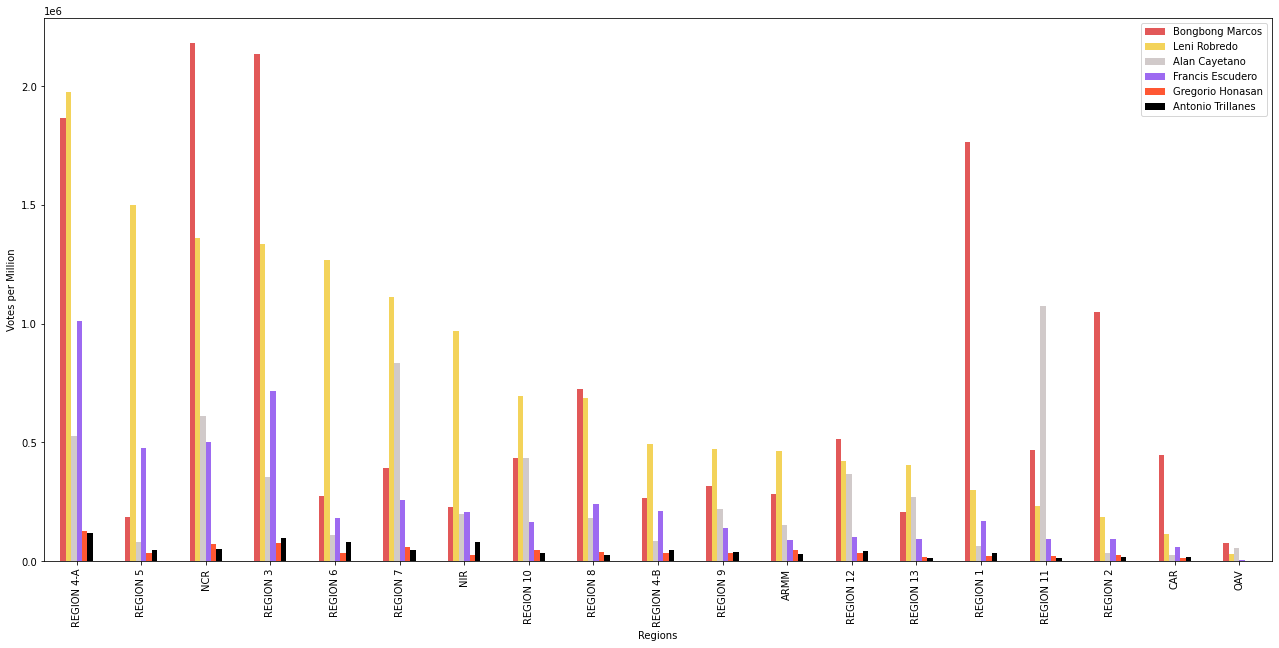

In [ ]:
# Vertical Barchart of all candidates per region (VP 2016)

vp_agg_function = {'Bongbong Marcos': 'sum', 'Leni Robredo': 'sum', 'Alan Cayetano': 'sum', 'Francis Escudero': 'sum', 'Gregorio Honasan': 'sum', 'Antonio Trillanes': 'sum'}
vp_data_2016_new = vp_data_2016.groupby(vp_data_2016['Region']).aggregate(vp_agg_function)

vp_col_colors = ['#E25858', '#F3D35A', '#D1CACA', '#9D6AF1', '#FF5733', '000000']
df_sorted_vp_2022 = vp_data_2016_new.sort_values('Leni Robredo', ascending=False)
vp_barchart = df_sorted_vp_2022.plot(kind="bar", color=vp_col_colors)

vp_figure = vp_barchart.get_figure()
vp_figure.set_size_inches(22, 10)
vp_barchart.set_xlabel("Regions")
vp_barchart.set_ylabel("Votes per Million")

Vertical bar chart based from the 2016 Vice-presidential elections, sorted ascending with basis from votes on Leni Robredo per Region.

Text(0, 0.5, 'Votes per Million')

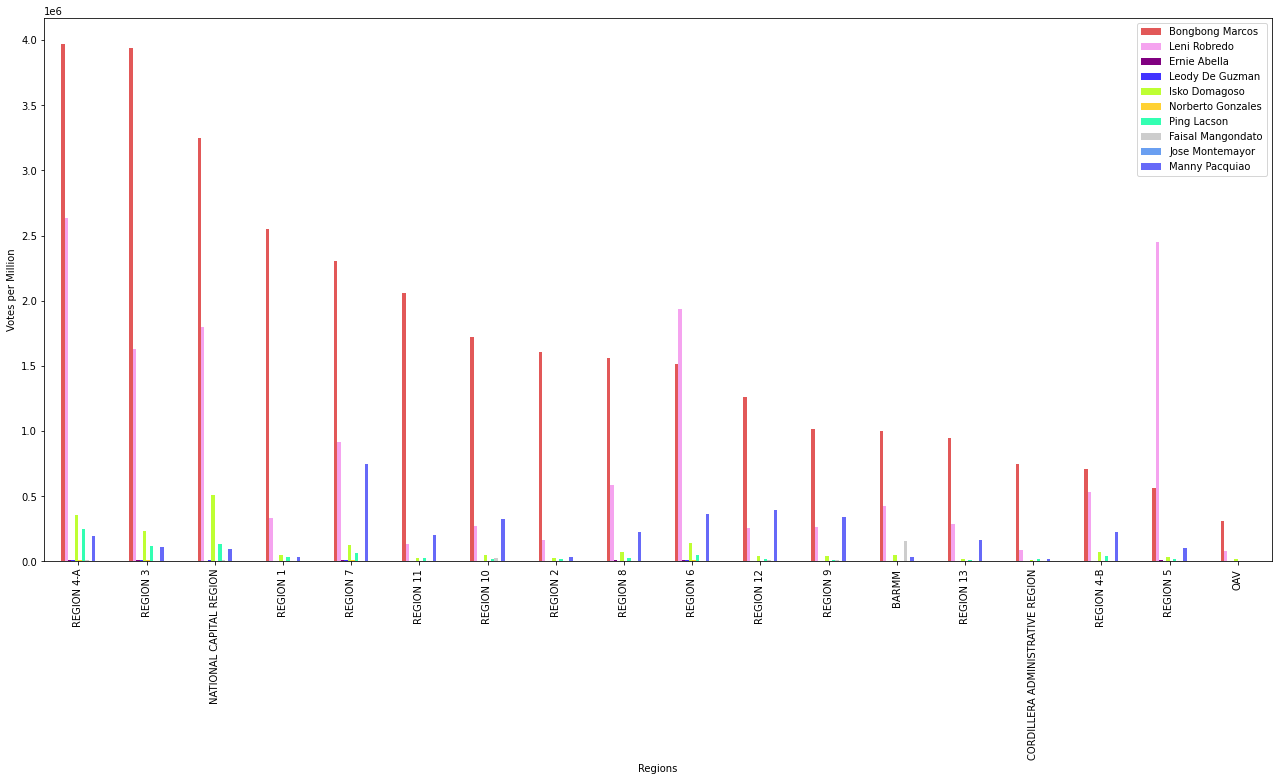

In [ ]:
# Vertical Barchart of all candidates per region (President 2022)
p_agg_function = {'Bongbong Marcos': 'sum', 'Leni Robredo': 'sum', 'Ernie Abella': 'sum', 'Leody De Guzman': 'sum', 'Isko Domagoso': 'sum', 'Norberto Gonzales': 'sum', 'Ping Lacson': 'sum', 'Faisal Mangondato': 'sum', 'Jose Montemayor': 'sum', 'Manny Pacquiao': 'sum'}
pres_data_2022_new = pres_data_2022.groupby(pres_data_2022['Region']).aggregate(p_agg_function)

pres_col_colors = ['#E25858', '#F5A3EF', '#800080', '#4233FF', '#BEFF33', '#FFD133', '#33FFB2', '#CDCDCD', '#6A9FF1', '#6669F8']

df_sorted_pres_2022 = pres_data_2022_new.sort_values('Bongbong Marcos', ascending=False)
pres_2022_barchart = df_sorted_pres_2022.plot(kind="bar", color=pres_col_colors)

pres_figure = pres_2022_barchart.get_figure()

pres_figure.set_size_inches(22,10)
pres_2022_barchart.set_xlabel("Regions")
pres_2022_barchart.set_ylabel("Votes per Million")

Vertical bar chart according to the 2022 Presidential elections dataset where it is sorted ascending according to Bongbong Marcos' votes per region. 

Text(0, 0.5, 'Votes per Million')

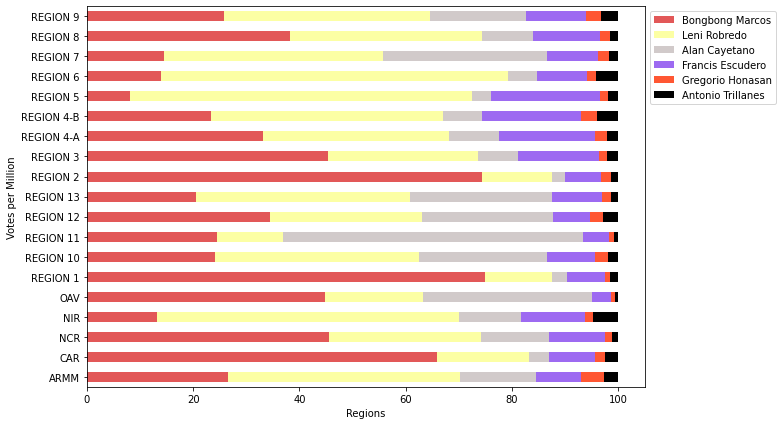

In [ ]:
# Stacked Bar Chart VP 2016 (Candidate, Region)
vp_agg_function = {'Bongbong Marcos': 'sum', 'Leni Robredo': 'sum', 'Alan Cayetano': 'sum', 'Francis Escudero': 'sum', 'Gregorio Honasan': 'sum', 'Antonio Trillanes': 'sum'}
#vp_data_2016_new = vp_data_2016.groupby(vp_data_2016['Region']).aggregate(vp_agg_function)
vp_data_2016_norm = vp_data_2016_new.div(vp_data_2016_new.sum(axis=1),axis=0)*100
vp_col_colors = ['#E25858', '#fcffa4', '#D1CACA', '#9D6AF1', '#FF5733', '#000000']
#vp_stacked_barchart = vp_data_2016_new.plot(kind="bar", stacked="True", color=vp_col_colors)

vp_stacked_barchart = vp_data_2016_norm.plot(kind="barh", stacked="True", color=vp_col_colors)



vp_figure2 = vp_stacked_barchart.get_figure()
vp_figure2.set_size_inches(10,7)
vp_stacked_barchart.legend(bbox_to_anchor=(1.0, 1.0))
vp_stacked_barchart.set_xlabel('Regions')
vp_stacked_barchart.set_ylabel('Votes per Million')

As seen on the normalized bar chart from the 2016 Vice-president elections data set, it is clear Robredo has the most votes in all regions with the exception from regions 1, 2, 3, 8, 12, CAR, NCR, and OAV since the following is where registered voters casted more votes on Marcos.

In [ ]:
# Normalized data for the stacked barchart (2016 VP Elections)
vp_data_2016_norm

,Bongbong Marcos,Leni Robredo,Alan Cayetano,Francis Escudero,Gregorio Honasan,Antonio Trillanes
Region,,,,,,
ARMM,26.598307,43.530832,14.424890,8.481487,4.318651,2.645833
CAR,65.963290,17.150957,3.845546,8.665725,1.819392,2.555089
NCR,45.604600,28.496782,12.794468,10.535767,1.471241,1.097142
NIR,13.230025,56.767093,11.682983,12.022164,1.630959,4.666775
OAV,44.752563,18.532945,31.806243,3.588424,0.624773,0.695052
REGION 1,74.931406,12.651996,2.710821,7.216386,0.940066,1.549325
REGION 10,24.109248,38.390068,24.044319,9.043759,2.562001,1.850604
REGION 11,24.548710,12.291537,56.468873,4.910467,1.062478,0.717935
REGION 12,34.536933,28.493440,24.697387,6.931350,2.399472,2.941418


Text(0, 0.5, 'Votes per Million')

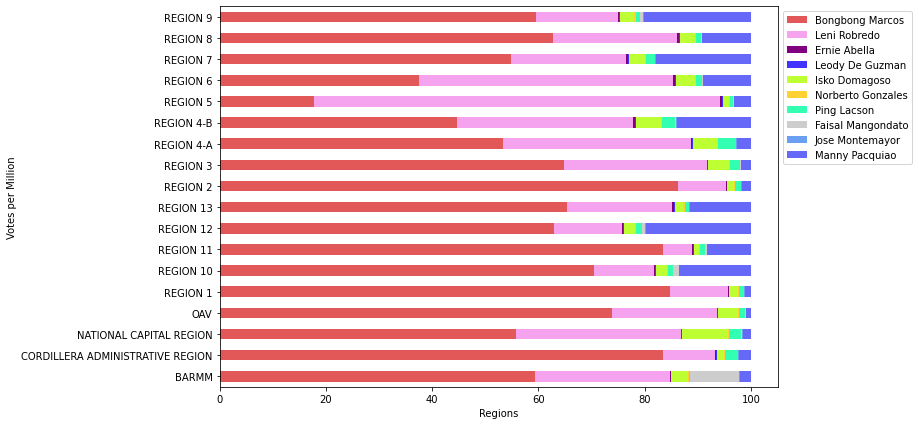

In [ ]:
# Stacked Bar Chart President 2022 (Candidate, Region)
p_agg_function = {'Bongbong Marcos': 'sum', 'Leni Robredo': 'sum', 'Ernie Abella': 'sum', 'Leody De Guzman': 'sum', 'Isko Domagoso': 'sum', 'Norberto Gonzales': 'sum', 'Ping Lacson': 'sum', 'Faisal Mangondato': 'sum', 'Jose Montemayor': 'sum', 'Manny Pacquiao': 'sum'}
pres_data_2022_new = pres_data_2022.groupby(pres_data_2022['Region']).aggregate(p_agg_function)
pres_data_2022_norm = pres_data_2022_new.div(pres_data_2022_new.sum(axis=1), axis=0)*100

pres_stacked_barchart = pres_data_2022_norm.plot(kind="barh", stacked="True", color=pres_col_colors)
pres_figure2 = pres_stacked_barchart.get_figure()
pres_figure2.set_size_inches(10,7)
pres_stacked_barchart.legend(bbox_to_anchor=(1.0, 1.0))
pres_stacked_barchart.set_xlabel('Regions')
pres_stacked_barchart.set_ylabel('Votes per Million')

A normalized bar chart based from the 2022 Presidential Candidates data, which was aggregated, has shown that Bongbong Marcos got the most votes except from regions 5 and 6 as Leni Robredo is leading only within those regions. 

In [ ]:
# Normalized data for the stacked barchart (2022 Presidential Elections)
pres_data_2022_norm

,Bongbong Marcos,Leni Robredo,Ernie Abella,Leody De Guzman,Isko Domagoso,Norberto Gonzales,Ping Lacson,Faisal Mangondato,Jose Montemayor,Manny Pacquiao
Region,,,,,,,,,,
BARMM,59.374377,25.313279,0.194551,0.081405,3.142231,0.168170,0.317879,9.189979,0.062528,2.155601
CORDILLERA ADMINISTRATIVE REGION,83.382489,9.883959,0.126960,0.118354,1.489875,0.096114,2.376580,0.129195,0.147300,2.249174
NATIONAL CAPITAL REGION,55.861224,30.878133,0.068876,0.153957,8.796179,0.086990,2.346685,0.154989,0.075516,1.577450
OAV,73.842170,19.791231,0.055707,0.052360,3.875571,0.073638,1.215748,0.161861,0.036341,0.895374
REGION 1,84.705001,10.951300,0.154912,0.137124,1.596605,0.117406,1.030222,0.082061,0.080100,1.145268
REGION 10,70.441826,11.248437,0.275198,0.209023,2.072309,0.207506,0.853229,1.061678,0.151293,13.479502
REGION 11,83.385532,5.440062,0.265003,0.173402,0.989632,0.205718,0.949623,0.272252,0.130396,8.188379
REGION 12,62.910533,12.807791,0.241240,0.175646,2.043601,0.191759,1.075907,0.631669,0.145609,19.776245
REGION 13,65.350838,19.843628,0.337623,0.211161,1.532365,0.255888,0.737341,0.125635,0.150997,11.454524


## Web Scraping Fake News Articles
<a id="web_scrape"></a>

In [ ]:
org_list= []
date_list= []
headline_list = []
summary_list = []
n_counter = 0

for page in range(5):
    html_text = requests.get('https://factsfirst.ph/fact-checks?4f29663e_page=' + str(page)).text
    soup = BeautifulSoup(html_text,'lxml')
    subheader = soup.find_all('div', class_ = 'byline-top')
    
    for subtext in subheader:
        headline = soup.select('.fact-check-title')
        summary = soup.select('.summary-in-list')
        organization = subtext.find('div', class_='byline-detail').find_next().find_next().text
        date = subtext.div.find_next().find_next().find_next().find_next().find_next().find_next().find_next().find_next().find_next().find_next().find_next().find_next().text
        org_list.append(organization)
        date_list.append(date)
    for rows in range(len(headline)):
        headline_list.append(headline[rows].getText())
        summary_list.append(summary[rows].getText())

In [ ]:
fake_news_data = pd.DataFrame(
    {'headline': headline_list,
     'summary': summary_list,
     'organization': org_list,
     'date': date_list
    })
fake_news_data

,headline,summary,organization,date
0,Senator-elect Robin Padilla claims PNoy did no...,"Rating: False\n\nAmong other things, the Aquin...",Baguio Chronicle,"May 29, 2022"
1,Premium rice selling for P20 a kilo in Quezon ...,Rating: False\n\nThe price for the rice variet...,Baguio Chronicle,"May 28, 2022"
2,HINDI TOTOO: Kinausap ng mga dilawan si John O...,Walang ibinigay na ebidensiya ang lalaki sa bu...,Rappler,"May 27, 2022"
3,"Sara Duterte to turn K-12 to K-14, push for RO...",Rating: Partly False\n\nDuterte has expressed ...,Baguio Chronicle,"May 27, 2022"
4,Hindi konektado ang pagpapailaw ng kulay pula ...,Hindi totoo ang kumakalat sa social media na b...,ABS-CBN,"May 27, 2022"
...,...,...,...,...
495,The Claim: Mark Villar started the 7.17 km Urd...,Mark Villar started the 7.17 km Urdaneta City ...,Baguio Chronicle,"March 21, 2022"
496,FACT CHECK: 'Di totoong nakakapagpasa ng COVID...,Hindi totoo ang pahayag ni Dr. Jose Montemayor...,ABS-CBN,"March 21, 2022"
497,The Claim: Leni Robredo topped the Google Sear...,Google Search Trend is not a survey body but a...,Baguio Chronicle,"March 21, 2022"
498,FACT CHECK\r\nThe Claim: Donât wear pink on ...,Donât wear pink on Election Day,Baguio Chronicle,"March 21, 2022"


In [ ]:
leni_data = list(fake_news_data[fake_news_data['headline'].str.contains("Robredo")]['headline'])
Robredodf = pd.DataFrame(leni_data,columns = ['headline']) 

In [ ]:
Robredodf

,headline
0,"Guanzon, walang sinabing 'hindi well educated'..."
1,FALSE: Robredo is a member of CPP-NPA-NDF
2,MANIPULADONG VIDEO: Nagbanta ng gulo si Putin ...
3,HINDI TOTOO: Hindi nagkaroon ng posisyon sa Ga...
4,HINDI TOTOO: Video ng pagpapahayag ni Duterte ...
...,...
120,"FACT CHECK | Quiboloy, inakusahang âCPP-NPA-..."
121,Hindi totoong kinulayan pink ang masjid bilang...
122,Leni Robredo topped the Google Search Trends f...
123,The Claim: Leni Robredo topped the Google Sear...


## Word Cloud
<a id="word_cloud"></a>

In [ ]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

# Cleaning the text
fake_news_data['headline']=fake_news_data['headline'].apply(cleanTxt)

shortword = re.compile(r'\W*\b\w{1,3}\b')

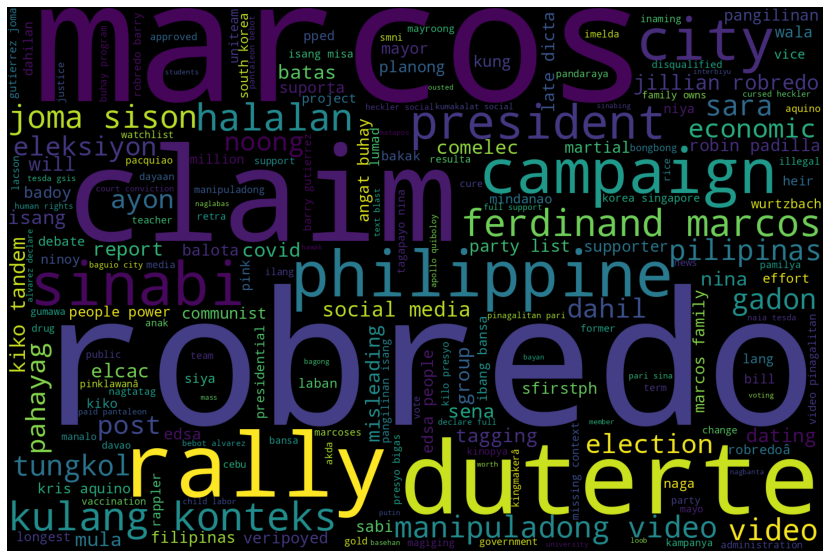

In [ ]:
# Plot Word Cloud
allWords = ' '.join([hdlne for hdlne in fake_news_data['headline']])
allWords = allWords.lower()

#Remove 'online Class'
removeWords = """totoo false fact check to too hindi walang para leni"""
for x in allWords.split():
    for i in removeWords.split():
        if x == i:
            patt = re.compile('(\s*){}(\s*)'.format(i))
            allWords=patt.sub('\\1 \\2', allWords)
            

#Restrict 2 letter word
shortword = re.compile(r'\W*\b\w{1,3}\b')
allWords = shortword.sub('', allWords)

#wordCloud = WordCloud(width = 500, height =300, random_state = 21, max_font_size = 119).generate(allWords)
wordCloud = WordCloud(width = 1500, height = 1000, random_state = 21).generate(allWords)

#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()
plt.figure( figsize=(20,10) );
plt.imshow(wordCloud);
plt.axis('off');

In [ ]:
word_freq = WordCloud().process_text(allWords)
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Freq'])

In [ ]:
#word_freq_df.to_csv('wordcloud.csv', sep='\t')

# Sentiment Analysis
<a id="sentiment_analysis"></a>

In [41]:
import nltk

In [42]:
sentiment_df = pd.read_csv("dataset/pos_neg_data.csv")

In [43]:
all_positive_data = sentiment_df['positive'].tolist()
all_negative_data = sentiment_df['negative'].tolist()

## Preprocess Data

In [44]:
import re 
import string
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [45]:
all_positive_sens = sentiment_df['positive'].tolist()
all_negative_sens = sentiment_df['negative'].tolist()

In [46]:
print('Number of positive text data: ', len(all_positive_sens))
print('Number of negative text data: ', len(all_negative_sens))

print('\nThe type of all_positive_sens is: ', type(all_positive_sens))
print('The type of a text entry is: ', type(all_negative_sens[0]))

Number of positive text data:  6445
Number of negative text data:  6445

The type of all_positive_sens is:  <class 'list'>
The type of a text entry is:  <class 'str'>


In [47]:
print("Positive text Example:")
print(all_positive_sens[10])

print("\nNegative text Example:")
print(all_negative_sens[10])

Positive text Example:
@Wanli_Minho he said i'm his ideal type in weekly idol and make a love pose for me &gt;&lt; i will tell him if i meet him. Don't worry :)

Negative text Example:
@angelhairhes please fra choose me this time :(


Preprocess tagalog sentence

In [48]:
import re
import string          

from nltk.corpus import stopwords      
from nltk.stem import PorterStemmer 
from nltk.tokenize import TweetTokenizer 

Remove hyperlinks, marks, styles, and some words related to starting header texts

In [49]:
remove_words = ['HINDI TOTOO:', 'FALSE:', 'MANIPULADONG VIDEO', 'FACT CHECK:', 'KULANG SA KONTEKSTO:', 'BINAGONG VIDEO:', 'The Claim:']

def remove_hyperlinks_marks_styles(sen):
    new_sen = re.sub(r'^RT[\s]+', '', sen)
    new_sen = re.sub(r'https?:\/\/.*[\r\n]*', '', new_sen)
    new_sen = re.sub(r'#', '', new_sen)
    
    for xword in remove_words:
        new_sen = re.sub(xword,'', new_sen)
    
    return new_sen

## Tokenize the string

Splitting string into individual words.

In [50]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

def tokenize_sen(sen):
    
    sen_tokens = tokenizer.tokenize(sen)
    
    return sen_tokens

### Remove stop works and punctuations

Remove stop words and punctuations. Stop words are words that don't add significant meaning to the text. For example, 'i' and 'me'.

In [51]:
stopwords_english = stopwords.words('english')

punctuations = string.punctuation

def remove_stopwords_punctuations(sen_tokens):
    
    sens_clean = []
    
    for word in sen_tokens:
        if (word not in stopwords_english and word not in punctuations):
            sens_clean.append(word)
            
    return sens_clean

In [52]:
stopwords_tagalog = stopwords.words('../tagalog_stop_word')

punctuations = string.punctuation

def remove_stopwords_punctuations(sen_tokens):
    
    sens_clean = []
    
    for word in sen_tokens:
        if (word not in stopwords_english and word not in punctuations):
            sens_clean.append(word)
            
    return sens_clean

# Stemming

In [53]:
stemmer = PorterStemmer()

def get_stem(sens_clean):
    
    sens_stem = []
    
    for word in sens_clean:
        stem_word = stemmer.stem(word)
        sens_stem.append(stem_word)
        
    return sens_stem

In [54]:
sen_example = all_positive_sens[500]
print(sen_example)

processed_sen = remove_hyperlinks_marks_styles(sen_example)
print("\nRemoved hyperlinks, text marks and styles:")
print(processed_sen)

sen_tokens = tokenize_sen(processed_sen)
print("\nTokenize the string:")
print(sen_tokens)

sens_clean = remove_stopwords_punctuations(sen_tokens)
print("\nRemove stop words and punctuations:")
print(sens_clean)

sens_stem = get_stem(sens_clean)
print("\nGet stem of each word:")
print(sens_stem)

@AndyHarker1 I will do. You too!! :) xx

Removed hyperlinks, text marks and styles:
@AndyHarker1 I will do. You too!! :) xx

Tokenize the string:
['i', 'will', 'do', '.', 'you', 'too', '!', '!', ':)', 'xx']

Remove stop words and punctuations:
[':)', 'xx']

Get stem of each word:
[':)', 'xx']


### Combining all preprocess techniques

In [55]:
def process_sen(sen):
    
    processed_sen = remove_hyperlinks_marks_styles(sen)
    sen_tokens = tokenize_sen(processed_sen)
    sens_clean = remove_stopwords_punctuations(sen_tokens)
    sens_stem = get_stem(sens_clean)
    
    return sens_stem

In [56]:
sen_example = all_negative_sens[356]
print(sen_example)

processed_sen = process_sen(sen_example)
print(processed_sen)

How do ppl not hear their goddamn dog barking? Seriously wish their dog would drop dead. &gt;:(
['ppl', 'hear', 'goddamn', 'dog', 'bark', 'serious', 'wish', 'dog', 'would', 'drop', 'dead', '>:(']


### Split data into two pieces, one for training and one for testing


In [57]:
#2564

test_pos = all_positive_sens[2300:]
train_pos = all_positive_sens[:2300]
test_neg = all_negative_sens[2300:]
train_neg = all_negative_sens[:2300]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

### Create frequency dictionary

In [58]:
def create_frequency(sens, ys):
    
    freq_d = {}

    # TODO: Create frequency dictionary
    for sen, y in zip(sens,ys):
        for word in process_sen(sen):
            
            pair = (word, y)
            if pair in freq_d:
                freq_d[pair] += 1
            else:
                freq_d[pair] = freq_d.get(pair, 1)
    
    return freq_d

In [59]:
# testing function

sens = ['i am happy', 'i am tricked', 'i am sad', 'i am tired', 'i am tired']
ys = [1, 0, 0, 0, 0]

freq_d = create_frequency(sens, ys)
print(freq_d)

{('happi', 1): 1, ('trick', 0): 1, ('sad', 0): 1, ('tire', 0): 2}


## Train model using Naive Bayes

In [60]:
# build the freqs dictionary

freqs = create_frequency(train_x, train_y)

In [61]:
def train_naive_bayes(freqs, train_x, train_y):
    
    loglikelihood = {}
    logprior = 0
    
    # calculate the number of unique words in vocab
    unique_words = set([pair[0] for pair in freqs.keys()])
    V = len(unique_words)
    
    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        
        # TODO: get N_pos and N_get
        if pair[1]>0:
            N_pos += freqs[(pair)]
        else:
            N_neg += freqs[(pair)]
            
            
    # TODO: calculate the number of documents
    D = train_y.shape[0]
    
    # TODO: calculate D_pos, the number of positive documents
    D_pos = sum(train_y)
    
    # TODO: calculate D_neg, the number of negative documents
    D_neg = D - sum(train_y)
    
    # TODO: calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)
    
    # for each unqiue word
    for word in unique_words:
        
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word,1),0)
        freq_neg = freqs.get((word,0),0)
        
        # calculate the probability that word is positive, and negative
        p_w_pos = (freq_pos +1) / (N_pos + V)
        p_w_neg = (freq_neg +1) / (N_neg + V)
        
        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos / p_w_neg)
        
    return logprior, loglikelihood

In [62]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)

## Predict Sentiments

In [63]:
def naive_bayes_predict(sen, logprior, loglikelihood):
    '''
    Input:
        texts: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the text (if found in the dictionary) + logprior (a number)

    '''

    # Process the text to get a list of words
    word_l = process_sen(sen)

    # Initialize probability to zero
    p = 0

    # Add the logprior
    p += logprior

    for word in word_l:

        # TODO: get log likelihood of each keyword
        if word in loglikelihood:
            p+= loglikelihood[word]

    return p

In [64]:
predicted_sens_list = []
for sen in Robredodf['headline']:
    p = naive_bayes_predict(sen, logprior, loglikelihood)
    predicted_sens_list.append(round(p,2))
    
predicted_sens_list2 = []
for sen in Marcosdf['headline']:
    p = naive_bayes_predict(sen, logprior, loglikelihood)
    predicted_sens_list2.append(round(p,2))

In [65]:
Marcosdf['Polarity'] = predicted_sens_list2
Marcosdf

,headline,Polarity
0,Hindi konektado ang pagpapailaw ng kulay pula ...,3.79
1,HINDI TOTOO: Pagmamay-ari ng mga Marcos ang sh...,3.00
2,"Prince Charles, heir apparent to the British t...",12.34
3,HINDI TOTOO: Gagawing mall ang UP Diliman sa i...,-0.46
4,FALSE: Marcos family owns â$2 quadrillionâ...,3.40
...,...,...
109,"FACT CHECK: NAIA, PGH, TESDA, SSS, & GSIS esta...",0.81
110,FACT CHECK | Bangui Windmills in Ilocos Norte ...,2.98
111,FACT-CHECK | Picture showing Marcos wearing an...,-1.61
112,FACT CHECK: Were the Marcoses kidnapped after ...,-1.58


In [66]:
Robredodf['Polarity'] = predicted_sens_list
Robredodf

,headline,Polarity
0,"Guanzon, walang sinabing 'hindi well educated'...",-3.29
1,FALSE: Robredo is a member of CPP-NPA-NDF,-2.86
2,MANIPULADONG VIDEO: Nagbanta ng gulo si Putin ...,-9.26
3,HINDI TOTOO: Hindi nagkaroon ng posisyon sa Ga...,-7.90
4,HINDI TOTOO: Video ng pagpapahayag ni Duterte ...,-4.28
...,...,...
120,"FACT CHECK | Quiboloy, inakusahang âCPP-NPA-...",-6.09
121,Hindi totoong kinulayan pink ang masjid bilang...,-3.30
122,Leni Robredo topped the Google Search Trends f...,-6.01
123,The Claim: Leni Robredo topped the Google Sear...,-6.01


==================================================

In [67]:
# Function to get the subjectivity

def getSubjectivity(text):
    return round((TextBlob(text).sentiment.subjectivity),3)

Robredodf['Subjectivity'] = Robredodf['headline'].apply(getSubjectivity)
Marcosdf['Subjectivity'] = Marcosdf['headline'].apply(getSubjectivity)


In [68]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif 0.9 >= float(score) <= 0.0:
        return 'Neutral'
    else:
        return 'Positive'
    
Robredodf['Analysis'] = Robredodf['Polarity'].apply(getAnalysis)
Marcosdf['Analysis'] = Marcosdf['Polarity'].apply(getAnalysis)

In [69]:
# Print all of the negative texts

j=1
sortedDF = Robredodf.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=='Negative':
            print(str(j) + ')' +sortedDF['headline'][i])
            print()
            j+=1

1)Guanzon, walang sinabing 'hindi well educated' si Robredo

2)FALSE: Robredo is a member of CPP-NPA-NDF

3)MANIPULADONG VIDEO: Nagbanta ng gulo si Putin sa Filipinas kung manalo si Robredo sa halalan

4)HINDI TOTOO: Hindi nagkaroon ng posisyon sa Gabinete si Robredo

5)HINDI TOTOO: Video ng pagpapahayag ni Duterte ng suporta para kay Robredo

6)MANIPULADONG VIDEO: Pinagalitan ng pari sina Robredo at Pangilinan sa isang misa

7)FACT CHECK: Walang inihahapag na plataporma si VP Robredo, ayon kay Gadon

8)FACT CHECK: Did Robredo lie about her stint as economics teacher?

9)HINDI TOTOO: Tagapayo nina Leni Robredo at Barry Gutierrez si Joma Sison

10)FACT CHECK: Robredo threatens chaos if defeated #FactsFirstPH

11)FACT CHECK: Jillian Robredo cursed at heckler on social media #FactsFirstPH

12)HINDI TOTOO: Tagapayo nina Leni Robredo at Barry Gutierrez si Joma Sison

13)HINDI TOTOO: Text blast tungkol sa suporta ni Joma Sison sa kandidatura ni Robredo

14)FACT CHECK: VP Robredo has no platf

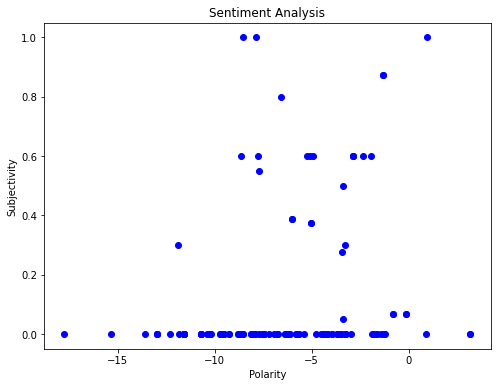

In [70]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, Robredodf.shape[0]):
    plt.scatter(Robredodf['Polarity'][i], Robredodf['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [71]:
Robredodf['Analysis'].value_counts()

Negative    121
Positive      4
Name: Analysis, dtype: int64

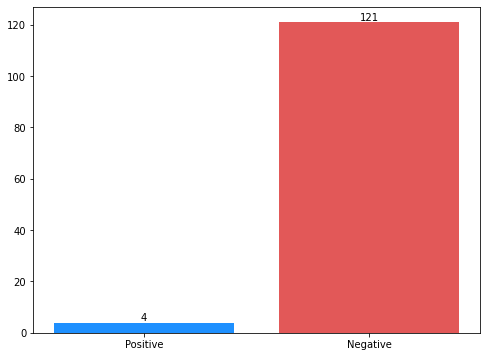

In [72]:
bar_robredo = Robredodf['Analysis'].value_counts()

plt.figure(figsize=(8,6))
x_ax = ['Positive', 'Negative']
y_ax = [bar_robredo['Positive'], bar_robredo['Negative']]

pos_neg_colors = ['#1e90ff','#E25858']
plt.bar(x_ax,y_ax, color= pos_neg_colors)

for i in range(len(x_ax)):
    plt.text(i, y_ax[i], y_ax[i], ha="center", va="bottom")


plt.show()

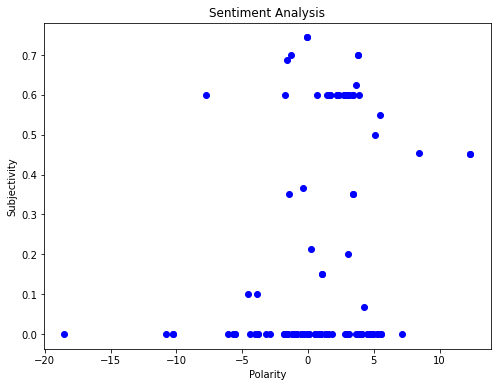

In [73]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, Marcosdf.shape[0]):
    plt.scatter(Marcosdf['Polarity'][i], Marcosdf['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

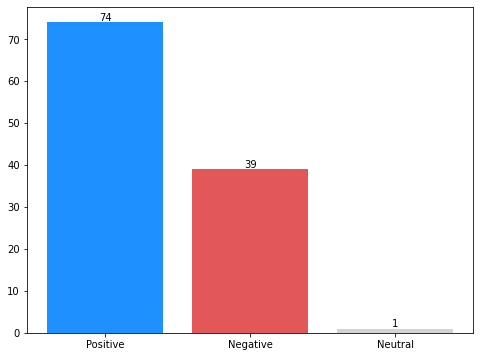

In [74]:
bar_marcos = Marcosdf['Analysis'].value_counts()
plt.figure(figsize=(8,6))

x_ax = ['Positive', 'Negative', 'Neutral']
y_ax = [bar_marcos['Positive'], bar_marcos['Negative'], bar_marcos['Neutral']]

pos_neg_colors = ['#1e90ff','#E25858','#d3d3d3']
plt.bar(x_ax,y_ax, color= pos_neg_colors)

for i in range(len(x_ax)):
    plt.text(i, y_ax[i], y_ax[i], ha="center", va="bottom")


plt.show()

## Techniques Used
<a id="tech_used"></a>

Sentiment analysis - Essentially, it is the act of detecting the emotional tone behind a string of words in order to comprehend the attitudes, ideas, and feelings stated in an online remarks. With the use of this method, we will be able to get some understanding of the sentiments and perceptions held by voters in the Philippines with regard to the candidate for the presidency. We are able to gain an idea of the polarity for a certain candidate by using the 500 false news articles that have been compiled on factsfirst.ph.

Naive Bayes Classifier - was used to tell and differentiate the positive and negative in a statement. After the training and testing of the data set,the model used to process each articles' polarity whether it is negative, positive or neutral.

## Additional Dataset Used
<a id="add_dataset_used"></a>

<h4> Election voter's profile 2016 & 2022</h4>

<p>voters_profile_2022.csv : Contains the demographic of voter's of 2016 Philippine presidential elections</p>

<p>voters_profile_2016.csv : Contains the demographic of voter's of 2022 Philippine presidential elections</p>

<small>source: GMA News Online Election Results 2016, GMA News Online Election Results 2022</small>

<br />
<h4> Facebook Demographic 2022</h4>
<p>fb_user_2022.csv : Contains Demographics of Filipino Facebook users</p>

<small>source: https://napoleoncat.com/stats/facebook-users-in-philippines/2022/04/</small>

<br />
<h4> Fake News Articles </h4>
<p>fake_news_data : Data Gathered using BeautifulSoup</p>

<small>source: https://factsfirst.ph/<small>



## Findings
<a id="findings"></a>

The Philippines is an ideal location from which to study the effectiveness of social media as a mobilization tool during an election campaign. This analysis contends that the use of social media in the 2022 election campaigns has increased as a rapidly expanding information and communication technology that overcomes some of the contact restrictions at the same time. In light of the information we have gathered from the dataset, we have found out:

- We have broken down the election results by region. Among the 18 regions, consistently on the top two are Bongbong Marcos and Leni Robredo. Robredo accounts for most of the votes in regions 5 and 6. Bongbong takes the lead in the rest.

- By normalizing the graph we can easily see the percentage garnered by each candidate in each region. 

- It is important to note that Faisal Mangondoto was BARMM’s third most voted likely due to his strong stance on shifting to federalism as the ultimate solution to the Bangsamoro issue.

- Data has shown that 82.4% of Filipinos uses social media with an average of 4.06 hours using said social media and almost 9 out of 10 Filipinos use Facebook on a daily basis.

- The majority of voters, 15.5 million, are between the ages of 25 and 34. While it is true that the majority of Facebook social media users are between the ages of 18 and 25, it is also crucial to note that the age group 25-34 years old is larger than the its age group total voters, given that 9 out of 10 Filipinos use Facebook on a daily basis. It is highly possible that 80 percent of those aged 25 to 34 use social media.

- Facebook Social relevance for 2022, Marcos won the online engagement, he remains significantly high throughtout the election, it has the same graph if we look into Duterte from 2016. We can see that social media has given a good perception on choosing a president in the election.

- In the sentimental analysis, the model predicts that out of 500 fact check articles,114 articles were related to Marcos and 125 articles are related to Robredo

- 73 out of 125 articles related to Marcos are favorable or positive, 40 of them are negative and 1 is neutral.

- 121 out of 125 articles related Robredo are negative or criticizing the camp, while the remaining 4 are the positive articles.

- In the presidential election of 2022, the effect of social media will be increasingly noticeable. Given that Marcos has been the most popular and well-liked candidate in Filipino mainstream social media. With the use of disinformation, Marcos was able to portray to be more appealing candidate, despite his terrible history. On the other side, Leni Robredo's camp has suffered in the propaganda war, with more unfavorable perceptions against her based on the sentiment analysis graph.





## Limitations of the EDA
<a id="limitation"></a>

The limitation encountered by this analysis is the non-inclusion of the data from different Facebook pages and/or groups also managed by the social media team of the different candidates. The analysis of social engagments are only gathered data from the official Facebook pages of the politicians. Another limitation encountered is that the availability of related analysis and constraints by the fixed data that can only be gathered such as the demographics.